In [76]:
%matplotlib inline
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,LabelEncoder, OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, classification_report
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from scipy import stats

# Loading the libraries

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# Displaying all the columns and rows

In [3]:
data = pd.read_excel('dataset_lfs_2024.xlsx')
# Loading the data

In [4]:
data.dropna(subset=["HRLYEARN"],inplace=True)
# Removing the null values in HRLYEARN column
data=data[data['MJH']==1]
# Filtering for single job holders
data=data[data['SCHOOLN']==1]
# Filtering for non students
data=data[data['FTPTMAIN']==1]
# Filtering for full-time workers
data=data[data['PERMTEMP']==1]
# Filtering for permanent workers
data['HRLYEARN']=data['HRLYEARN']/100
# The data dictionary for this dataset indicated that the last 2 values of this numeric column were the decimal points. So dividing the HRLYEARN column by 100 will add 2 decimal points. 
data['UHRSMAIN']=data['UHRSMAIN']/10
data['AHRSMAIN']=data['AHRSMAIN']/10
data['UTOTHRS']=data['UTOTHRS']/10
data['ATOTHRS']=data['ATOTHRS']/10
data['HRSAWAY']=data['HRSAWAY']/10
data['PAIDOT']=data['PAIDOT']/10
data['UNPAIDOT']=data['UNPAIDOT']/10
data['XTRAHRS']=data['XTRAHRS']/10
# # The data dictionary for this dataset indicated that the last 1 values of the 8 numeric columns above were the decimal points. So dividing the UHRSMAIN column by 100 will add 1 decimal points.

In [11]:
#profile1 = ProfileReport(data, title="Profiling Report")
#profile1.to_file("EDA after eliminating blanks of Usual Hourly Wages (HRLYEARN).html")
# Generating the profiling report after removing the null values in HRLYEARN column

In [78]:
#caclulating the high imbalances for variables: LFSSTAT ,MJH, FTPTMAIN, PERMTEMP, SCHOOLN ,HRSAWAY, PAIDOT, UNPAIDOT, XTRAHRS

#for column in ['LFSSTAT','MJH','FTPTMAIN','PERMTEMP','SCHOOLN','HRSAWAY','PAIDOT','UNPAIDOT','XTRAHRS']:
    #print(data[column].value_counts(normalize=True)*100)   

In [5]:
full_variable_name_mapping={
'rec_num':'Order of record in file',
'survyear':'Survey year',
'survmnth':'Survey month',
'lfsstat':'Labour force status',
'prov':'Province',
'cma':'Nine largest CMAs',
'age_12':'Five-year age group of respondent',
'age_6':'Age in 2 and 3 year groups, 15 to 29',
'sex':'Sex of respondent',
'marstat':'Marital status of respondent',
'educ':'Highest educational attainment',
'mjh':'Single or multiple jobholder',
'everwork':'Identifies if a person has worked in the last year',
'ftptlast':'Full- or part-time status of last job',
'cowmain':'Class of worker, main job',
'immig':'Immigrant status',
'naics_21':'Industry of main job',
'noc_10':'Occupation at main job (noc_10)',
'noc_43':'Occupation at main job (noc_43)',
'yabsent':'Reason of absence, full week',
'wksaway':'Number of weeks absent from work',
'payaway':'Paid for time off, full-week absence only',
'uhrsmain':'Usual hours worked per week at main job',
'ahrsmain':'Actual hours worked per week at main job',
'ftptmain':'Full- or part-time status at main or only job',
'utothrs':'Usual hours worked per week at all jobs',
'atothrs':'Actual hours worked per week at all jobs',
'hrsaway':'Hours away from work, part-week absence only',
'yaway':'Reason for part-week absence',
'paidot':'Paid overtime hours in reference week',
'unpaidot':'Unpaid overtime hours in reference week',
'xtrahrs':'Number of overtime or extra hours worked',
'whypt':'Reason for part-time work',
'tenure':'Job tenure with current employer',
'prevten':'Job tenure with previous employer',
'hrlyearn':'Usual hourly wages',
'union':'Union status',
'permtemp':'Job permanency',
'estsize':'Establishment size',
'firmsize':'Firm size',
'durunemp':'Duration of unemployment',
'flowunem':'Flows into unemployment',
'unemftpt':'Job seekers by type of work sought and temporary layoffs by work status of last job',
'whylefto':'Reason for leaving job during previous year (whylefto)',
'whyleftn':'Reason for leaving job during previous year (whyleftn)',
'durjless':'Duration of joblessness',
'availabl':'Availability during the reference week',
'lkpubag':'Unemployed, used public employment agency',
'lkemploy':'Unemployed, checked with employers directly',
'lkrels':'Unemployed, checked with friends or relatives',
'lkatads':'Unemployed, looked at job ads',
'lkansads':'Unemployed, placed or answered ads',
'lkothern':'Unemployed, other methods',
'prioract':'Main activity before started looking for work',
'ynolook':'Reason for not looking for work during the reference week',
'tlolook':'Temporary layoff, looked for work during the last four weeks',
'schooln':'Current student status',
'efamtype':'Type of economic family',
'agyownk':'Age of youngest child',
'finalwt':'Standard final weight'}

# Mapping descriptions to the variable names

In [6]:
data.describe()
# Displaying the summary statistics of the data

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,EDUC,MJH,EVERWORK,FTPTLAST,COWMAIN,IMMIG,NAICS_21,NOC_10,NOC_43,YABSENT,WKSAWAY,PAYAWAY,UHRSMAIN,AHRSMAIN,FTPTMAIN,UTOTHRS,ATOTHRS,HRSAWAY,YAWAY,PAIDOT,UNPAIDOT,XTRAHRS,WHYPT,TENURE,PREVTEN,HRLYEARN,UNION,PERMTEMP,ESTSIZE,FIRMSIZE,DURUNEMP,FLOWUNEM,UNEMFTPT,WHYLEFTO,WHYLEFTN,DURJLESS,AVAILABL,LKPUBAG,LKEMPLOY,LKRELS,LKATADS,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT
count,155250.000000,155250.0,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,24774.000000,155250.000000,155250.000000,155250.000000,155250.0,0.0,0.0,155250.000000,155250.000000,155250.000000,155250.000000,155250.000000,12117.000000,12117.000000,12117.000000,155250.000000,155250.000000,155250.0,155250.000000,155250.000000,143133.000000,20286.000000,143133.000000,143133.000000,143133.000000,0.0,155250.000000,0.0,155250.000000,155250.000000,155250.0,155250.000000,155250.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,155250.0,155250.000000,67144.000000,155250.000000
mean,55302.464612,2024.0,2.511253,1.078048,34.541089,1.787034,6.114628,4.828812,1.467936,2.652676,3.964940,1.0,NaN,NaN,1.720006,2.686158,12.977153,4.942596,21.365308,1.865808,17.331848,1.475283,39.379847,36.217362,1.0,39.379847,36.220522,1.542902,1.773292,0.889051,0.755589,1.644640,NaN,100.132335,NaN,37.209966,2.333688,1.0,2.302821,3.073894,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.832064,2.202118,315.259156
std,31965.500596,0.0,1.118995,0.268248,14.358146,2.797997,2.350304,1.202854,0.498972,2.111919,1.382313,0.0,NaN,NaN,0.448997,0.613119,5.008835,2.748704,13.009996,0.962906,24.744883,0.499409,5.790077,13.463762,0.0,5.790077,13.467056,4.831780,1.040619,3.696850,3.045037,4.707673,NaN,82.954092,NaN,18.554476,0.932136,0.0,1.053113,1.124185,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,4.946202,1.076246,289.202744
min,2.000000,2024.0,1.000000,1.000000,10.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.0,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,30.000000,0.000000,1.0,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,1.000000,NaN,5.770000,1.000000,1.0,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.000000,1.000000,1.000000
25%,27596.250000,2024.0,2.000000,1.000000,24.000000,0.000000,4.000000,4.000000,1.000000,1.000000,4.000000,1.0,NaN,NaN,1.000000,3.000000,9.000000,2.000000,9.000000,1.000000,1.000000,1.000000,37.500000,35.000000,1.0,37.500000,35.000000,0.000000,1.000000,0.000000,0.000000,0.000000,NaN,26.000000,NaN,24.000000,1.000000,1.0,1.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.000000,1.000000,137.000000
50%,55279.500000,2024.0,3.000000,1.000000,35.000000,0.000000,6.000000,5.000000,1.000000,1.000000,4.000000,1.0,NaN,NaN,2.000000,3.000000,14.000000,5.000000,20.000000,2.000000,4.000000,1.000000,40.000000,40.000000,1.0,40.000000,40.000000,0.000000,2.000000,0.000000,0.000000,0.000000,NaN,73.000000,NaN,32.790000,3.000000,1.0,2.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.000000,2.000000,220.000000
75%,83006.000000,2024.0,4.000000,1.000000,47.000000,4.000000,8.000000,6.000000,2.000000,5.000000,5.000000,1.0,NaN,NaN,2.000000,3.000000,17.000000,7.000000,34.000000,3.000000,25.000000,2.000000,40.000000,40.000000,1.0,40.000000,40.000000,0.000000,3.000000,0.000000,0.000000,0.000000,NaN,171.000000,NaN,46.150000,3.000000,1.0,3.000000,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.000000,3.000000,370.000000
max,112082.000000,2024.0,4.000000,2.000000,59.000000,9.000000,10.000000,6.000000,2.000000,6.000000,6.000000,1.0,NaN,NaN,2.000000,3.000000,21.000000,10.000000,43.000000,3.000000,99.000000,2.000000,99.000000,99.000000,1.0,99.000000,99.000000,99.000000,4.000000,80.000000,98.000000,98.000000,NaN,240.000000,Na

In [7]:
data.info()
# Displaying the data types of the columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155250 entries, 4 to 442573
Data columns (total 60 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   REC_NUM   155250 non-null  int64  
 1   SURVYEAR  155250 non-null  int64  
 2   SURVMNTH  155250 non-null  int64  
 3   LFSSTAT   155250 non-null  int64  
 4   PROV      155250 non-null  int64  
 5   CMA       155250 non-null  int64  
 6   AGE_12    155250 non-null  int64  
 7   AGE_6     24774 non-null   float64
 8   SEX       155250 non-null  int64  
 9   MARSTAT   155250 non-null  int64  
 10  EDUC      155250 non-null  int64  
 11  MJH       155250 non-null  float64
 12  EVERWORK  0 non-null       float64
 13  FTPTLAST  0 non-null       float64
 14  COWMAIN   155250 non-null  float64
 15  IMMIG     155250 non-null  int64  
 16  NAICS_21  155250 non-null  float64
 17  NOC_10    155250 non-null  float64
 18  NOC_43    155250 non-null  float64
 19  YABSENT   12117 non-null   float64
 20  WKSA

In [8]:
data_missing_values= data.isnull().sum()
# Counting the missing values in each column
data_percent_missing = round(data.isnull().sum() * 100 / len(data),2)
# Calculating the percentage of missing values in each column
missing_values_percent=pd.DataFrame(data_percent_missing, columns=['Missing Values %'])
# Creating a dataframe to display the missing values percentage
missing_values_percent=missing_values_percent.rename_axis('Variables')
# Renaming the index

In [9]:
data.head()
# Displaying the first 5 rows of the data

,REC_NUM,SURVYEAR,SURVMNTH,LFSSTAT,PROV,CMA,AGE_12,AGE_6,SEX,MARSTAT,EDUC,MJH,EVERWORK,FTPTLAST,COWMAIN,IMMIG,NAICS_21,NOC_10,NOC_43,YABSENT,WKSAWAY,PAYAWAY,UHRSMAIN,AHRSMAIN,FTPTMAIN,UTOTHRS,ATOTHRS,HRSAWAY,YAWAY,PAIDOT,UNPAIDOT,XTRAHRS,WHYPT,TENURE,PREVTEN,HRLYEARN,UNION,PERMTEMP,ESTSIZE,FIRMSIZE,DURUNEMP,FLOWUNEM,UNEMFTPT,WHYLEFTO,WHYLEFTN,DURJLESS,AVAILABL,LKPUBAG,LKEMPLOY,LKRELS,LKATADS,LKANSADS,LKOTHERN,PRIORACT,YNOLOOK,TLOLOOK,SCHOOLN,EFAMTYPE,AGYOWNK,FINALWT
4,5,2024,1,1,35,0,6,NaN,1,1,4,1.0,NaN,NaN,2.0,3,6.0,8.0,35.0,NaN,NaN,NaN,45.0,42.0,1.0,45.0,42.0,0.0,NaN,0.0,0.0,0.0,NaN,212.0,NaN,28.00,3.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3,2.0,231
6,7,2024,1,1,24,2,10,NaN,1,5,6,1.0,NaN,NaN,2.0,3,14.0,3.0,13.0,NaN,NaN,NaN,37.5,37.5,1.0,37.5,37.5,0.0,NaN,0.0,0.0,0.0,NaN,240.0,NaN,24.74,3.0,1.0,3.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1,NaN,159
7,8,2024,1,1,59,0,3,6.0,1,2,4,1.0,NaN,NaN,2.0,3,6.0,8.0,35.0,NaN,NaN,NaN,40.0,84.0,1.0,40.0,84.0,0.0,NaN,44.0,0.0,44.0,NaN,17.0,NaN,40.00,3.0,1.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,131
10,11,2024,1,1,59,0,10,NaN,1,1,4,1.0,NaN,NaN,1.0,3,16.0,3.0,13.0,NaN,NaN,NaN,35.0,20.0,1.0,35.0,20.0,15.0,0.0,0.0,0.0,0.0,NaN,240.0,NaN,36.33,1.0,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,299
11,12,2024,1,2,24,0,4,NaN,2,1,4,1.0,NaN,NaN,2.0,3,7.0,1.0,4.0,0.0,3.0,2.0,40.0,0.0,1.0,40.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,34.75,3.0,1.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2,NaN,390


In [10]:
def statistics_table(data_frame):
    data_type_mapping={
    'rec_num':'Nominal',
    'survyear':'Ordinal',
    'survmnth':'Ordinal',
    'lfsstat':'Nominal',
    'prov':'Nominal',
    'cma':'Nominal',
    'age_12':'Ordinal',
    'age_6':'Ordinal',
    'sex':'Nominal',
    'marstat':'Nominal',
    'educ':'Ordinal',
    'mjh':'Nominal',
    'everwork':'Nominal',
    'ftptlast':'Nominal',
    'cowmain':'Nominal',
    'immig':'Nominal',
    'naics_21':'Nominal',
    'noc_10':'Nominal',
    'noc_43':'Nominal',
    'yabsent':'Nominal',
    'wksaway':'Nominal',
    'payaway':'Nominal',
    'uhrsmain':'Continuous',
    'ahrsmain':'Continuous',
    'ftptmain':'Nominal',
    'utothrs':'Continuous',
    'atothrs':'Continuous',
    'hrsaway':'Continuous',
    'yaway':'Nominal',
    'paidot':'Continuous',
    'unpaidot':'Continuous',
    'xtrahrs':'Continuous',
    'whypt':'Nominal',
    'tenure':'Discrete',
    'prevten':'Discrete',
    'hrlyearn':'Continuous',
    'union':'Nominal',
    'permtemp':'Nominal',
    'estsize':'Ordinal',
    'firmsize':'Ordinal',
    'durunemp':'Discrete',
    'flowunem':'Nominal',
    'unemftpt':'Nominal',
    'whylefto':'Nominal',
    'whyleftn':'Nominal',
    'durjless':'Discrete',
    'availabl':'Nominal',
    'lkpubag':'Nominal',
    'lkemploy':'Nominal',
    'lkrels':'Nominal',
    'lkatads':'Nominal',
    'lkansads':'Nominal',
    'lkothern':'Nominal',
    'prioract':'Nominal',
    'ynolook':'Nominal',
    'tlolook':'Nominal',
    'schooln':'Nominal',
    'efamtype':'Nominal',
    'agyownk':'Ordinal',
    'finalwt':'Continuous'}

    data_object_mapping={
    'rec_num':'Qualitative',
    'survyear':'Qualitative',
    'survmnth':'Qualitative',
    'lfsstat':'Qualitative',
    'prov':'Qualitative',
    'cma':'Qualitative',
    'age_12':'Qualitative',
    'age_6':'Qualitative',
    'sex':'Qualitative',
    'marstat':'Qualitative',
    'educ':'Qualitative',
    'mjh':'Qualitative',
    'everwork':'Qualitative',
    'ftptlast':'Qualitative',
    'cowmain':'Qualitative',
    'immig':'Qualitative',
    'naics_21':'Qualitative',
    'noc_10':'Qualitative',
    'noc_43':'Qualitative',
    'yabsent':'Qualitative',
    'wksaway':'Qualitative',
    'payaway':'Qualitative',
    'uhrsmain':'Quantitative',
    'ahrsmain':'Quantitative',
    'ftptmain':'Qualitative',
    'utothrs':'Quantitative',
    'atothrs':'Quantitative',
    'hrsaway':'Quantitative',
    'yaway':'Qualitative',
    'paidot':'Quantitative',
    'unpaidot':'Quantitative',
    'xtrahrs':'Quantitative',
    'whypt':'Qualitative',
    'tenure':'Quantitative',
    'prevten':'Quantitative',
    'hrlyearn':'Quantitative',
    'union':'Qualitative',
    'permtemp':'Qualitative',
    'estsize':'Qualitative',
    'firmsize':'Qualitative',
    'durunemp':'Qualitative',
    'flowunem':'Qualitative',
    'unemftpt':'Qualitative',
    'whylefto':'Qualitative',
    'whyleftn':'Qualitative',
    'durjless':'Qualitative',
    'availabl':'Qualitative',
    'lkpubag':'Qualitative',
    'lkemploy':'Qualitative',
    'lkrels':'Qualitative',
    'lkatads':'Qualitative',
    'lkansads':'Qualitative',
    'lkothern':'Qualitative',
    'prioract':'Qualitative',
    'ynolook':'Qualitative',
    'tlolook':'Qualitative',
    'schooln':'Qualitative',
    'efamtype':'Qualitative',
    'agyownk':'Qualitative',
    'finalwt':'Quantitative'}
    data_table=data_frame.columns.to_frame(index=False)
    data_table=data_table.rename(columns={0:'Variable Name'})
    columns=list(data_table.iloc[:,0] )
    data_table_mean_lst=[]
    data_table_median_lst=[]
    data_table_min_lst=[]
    data_table_max_lst=[]
    data_table_std_lst=[]
    data_table_object_lst=[]
    data_table_dtype_lst=[]

    for column in columns:
        data_table_mean_lst.append(round(data_frame[column].mean(),2))
        data_table_median_lst.append(round(data_frame[column].median(),2))
        data_table_min_lst.append(round(data_frame[column].min(),2))
        data_table_max_lst.append(round(data_frame[column].max(),2))
        data_table_std_lst.append(round(data_frame[column].std(),2))
        data_table_object_lst.append(data_object_mapping.get((column.lower())))
        data_table_dtype_lst.append(data_type_mapping.get((column.lower())))
    summary_statistics_table=pd.DataFrame(list(zip(columns,data_table_object_lst,data_table_dtype_lst,data_table_mean_lst,data_table_median_lst,data_table_min_lst,data_table_max_lst,data_table_std_lst)),
                                      columns=['Variable','Data','Data Type','Mean','Median','Min','Max','Standard Deviation'])
    return summary_statistics_table

In [11]:
summary_statistics_table=statistics_table(data)

In [12]:
#removing means from non continous and discrete variables
summary_statistics_table["Mean"] = summary_statistics_table.apply(lambda row: row["Mean"] if row["Data Type"].lower() in ["continuous", "discrete"] else None, axis=1)
summary_statistics_table["Mean"] = summary_statistics_table.apply(lambda row: row["Mean"] if row["Data Type"].lower() in ["continuous", "discrete"] else None, axis=1)
summary_statistics_table["Median"] = summary_statistics_table.apply(lambda row: None if row["Data Type"].lower() == "nominal" else row["Median"] , axis=1)
summary_statistics_table=summary_statistics_table.merge(missing_values_percent,left_on='Variable',right_index=True)
summary_statistics_table.sort_values(by=['Missing Values %','Variable'],inplace=True)
summary_statistics_table.reset_index(drop=True,inplace=True)

summary_statistics_table_1=summary_statistics_table[['Variable','Data','Data Type']]
summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))
summary_statistics_table_1=summary_statistics_table_1[['Variable','Description','Data','Data Type']]
summary_statistics_table_1.to_excel('Summary Statistics Table_Figure_3.xlsx',index=False)  

summary_statistics_table_2=summary_statistics_table.drop(columns=['Data','Data Type'],axis=1)
summary_statistics_table_2.to_excel('Summary Statistics Table_Figure_2.xlsx',index=False)  

# Creating a function to generate the statistics table for excel

/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_2475/1730602260.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summary_statistics_table_1["Description"]=summary_statistics_table_1["Variable"].apply(lambda x: full_variable_name_mapping.get(x.lower()))


In [13]:
remove_attributes=list(summary_statistics_table[summary_statistics_table_2['Missing Values %']>56.00]['Variable'])
#creating a list of variables with more than 56% missing values

# Dropping the below variables as they are not important
remove_attributes.append('SURVMNTH')
remove_attributes.append('SURVYEAR')
remove_attributes.append('REC_NUM')
remove_attributes.append('FINALWT')

##################################

remove_attributes.append('LFSSTAT')
remove_attributes.append('MJH')
remove_attributes.append('FTPTMAIN')
#deleting because we are only looking at full timer workers not parttime.
remove_attributes.append('PERMTEMP')
#already filtered for full time jobs
remove_attributes.append('SCHOOLN')
#only looking at non students and not full time or part time students

##################################
 
remove_attributes.append('HRSAWAY')
#Hours away from work, part-week absence only low variance has 79 perecent 0s
remove_attributes.append('PAIDOT')
#Paid over time has low variance 83% of zeros
remove_attributes.append('UNPAIDOT')
#Upaid overtime has 83% of zeros
remove_attributes.append('XTRAHRS')
#Contains over 70% of zeroes

data2=data.drop(columns=remove_attributes)
#dropping the variables with more than 56% missing values and creating a new dataframe.


In [14]:
data2['SEX']=data2['SEX'].map({1:0,2:1})
#Male is 0 and Female is 1. 
data2['IMMIG']=data2['IMMIG'].map({1:1,2:1,3:0})
#immigrant is 1 and non immigrant is 0data2['MARSTAT']=data2['MARSTAT'].map({1:1,2:0,3:0,4:0,5:0,6:0})
data2['MARSTAT']=data2['MARSTAT'].map({1:1,2:0,3:0,4:0,5:0,6:0})
#Married is 1 and not married is 0
data2['CMA']=data2['CMA'].map({0:0,1:1,2:1,3:1,4:1,5:1,6:1,7:1,8:1,9:1})
#1 is for the 9 largest CMAs and 0 is for the rest.

data2['EFAMTYPE']=data2['EFAMTYPE'].map({
    1:'Person not in an economic family',
    2:'Dual-earner couple, no children or none under 25',
    3:'Dual-earner couple, youngest child 0 to 17',
    4:'Dual-earner couple, youngest child 18 to 24',
    5:'Single-earner couple, male employed, no children or none under 25',
    6:'Single-earner couple, male employed, youngest child 0 to 17',
    7:'Single-earner couple, male employed, youngest child 18 to 24',
    8:'Single-earner couple, female employed, no children or none under 25',
    9:'Single-earner couple, female employed, youngest child 0 to 17',
    10:'Single-earner couple, female employed, youngest child 18 to 24',
    11:'Non-earner couple, no children or none under 25',
    12:'Non-earner couple, youngest child 0 to 17',
    13:'Non-earner couple, youngest child 18 to 24',
    14:'Lone-parent family, parent employed, youngest child 0 to 17',
    15:'Lone-parent family, parent employed, youngest child 18 to 24',
    16:'Lone-parent family, parent not employed, youngest child 0 to 17',
    17:'Lone-parent family, parent not employed, youngest child 18 to 24',
    18:'Other families'
})
# Mapping the economic family type

data2['COWMAIN']=data2['COWMAIN'].map({1:'Public sector employees',2:'Private sector employees'})
# Mapping the class of worker

data2['PROV']=data2['PROV'].map({10:'NL',11:'PE',12:'NS',13:'NB',24:'QC',35:'ON',46:'MB',47:'SK',48:'AB',59:'BC'})
# Mapping the provinces

data2['AGE_12']=data2['AGE_12'].map({
    1:'15-19'
    ,2:'20-24'
    ,3:'25-29'
    ,4:'30-34'
    ,5:'35-39'
    ,6:'40-44'
    ,7:'45-49'
    ,8:'50-54'
    ,9:'55-59'
    ,10:'60-64'
    ,11:'65-69'
    ,12:'70+'})
# Mapping the age groups

data2['EDUC']=data2['EDUC'].map({
    1:'Some high school'
    ,2:'High school graduate'
    ,3:'Some post-secondary'
    ,4:'Post-secondary certificate or diploma'
    ,5:'Bachelor\'s degree'
    ,6:'Above bachelor\'s degree'})
# Mapping the education levels

data2['NAICS_21']=data2['NAICS_21'].map({
1:'Agriculture'
,2:'Forestry and logging and support activities for forestry'
,3:'Fishing, hunting and trapping'
,4:'Mining, quarrying, and oil and gas extraction'
,5:'Utilities'
,6:'Construction'
,7:'Manufacturing - durable goods'
,8:'Manufacturing - non-durable goods'
,9:'Wholesale trade'
,10:'Retail trade'
,11:'Transportation and warehousing'
,12:'Finance and insurance'
,13:'Real estate and rental and leasing'
,14:'Professional, scientific and technical services'
,15:'Business, building and other support services'
,16:'Educational services'
,17:'Health care and social assistance'
,18:'Information, culture and recreation'
,19:'Accommodation and food services'
,20:'Other services (except public administration)'
,21:'Public administration' 
})
# Mapping the industry

data2['FIRMSIZE']=data2['FIRMSIZE'].map({
     1:'Less than 20 employees'
    ,2:'20-99 employees'
    ,3:'100-500 employees'
    ,4:'More than 500 employees'})
# Mapping the firm size

data2['UNION']=data2['UNION'].map({
    1:'Union member',
    2:'Not a member but covered by a union contract or collective agreement',
    3:'Non-unionized'})
# Mapping the union status

data2['NOC_43']=data2['NOC_43'].map({
    1:'Legislative and senior management occupations',
    2:'Specialized middle management occupations',
    3:'Middle management occupations in retail and wholesale trade and customer services',
    4:'Middle management occupations in trades, transportation, production and utilities',
    5:'Professional occupations in finance',
    6:'Professional occupations in business',
    7:'Administrative and financial supervisors and specialized administrative occupations',
    8:'Administrative occupations and transportation logistics occupations',
    9:'Administrative and financial support and supply chain logistics occupations',
    10:'Professional occupations in natural sciences',
    11:'Professional occupations in applied sciences (except engineering)',
    12:'Professional occupations in engineering',
    13:'Technical occupations related to natural and applied sciences',
    14:'Health treating and consultation services professionals',
    15:'Therapy and assessment professionals',
    16:'Nursing and allied health professionals',
    17:'Technical occupations in health',
    18:'Assisting occupations in support of health services',
    19:'Professional occupations in law',
    20:'Professional occupations in education services',
    21:'Professional occupations in social and community services',
    22:'Professional occupations in government services',
    23:'Occupations in front-line public protection services',
    24:'Paraprofessional occupations in legal, social, community and education services',
    25:'Assisting occupations in education and in legal and public protection',
    26:'Care providers and public protection support occupations and student monitors, crossing guards and related occupations',
    27:'Professional occupations in art and culture',
    28:'Technical occupations in art, culture and sport',
    29:'Occupations in art, culture and sport',
    30:'Support occupations in art, culture and sport',
    31:'Retail sales and service supervisors and specialized occupations in sales and services',
    32:'Occupations in sales and services',
    33:'Sales and service representatives and other customer and personal services occupations',
    34:'Sales and service support occupations',
    35:'Technical trades and transportation officers and controllers',
    36:'General trades',
    37:'Mail and message distribution, other transport equipment operators and related maintenance workers',
    38:'Helpers and labourers and other transport drivers, operators and labourers',
    39:'Supervisors and occupations in natural resources, agriculture and related production',
    40:'Workers and labourers in natural resources, agriculture and related production',
    41:'Supervisors, central control and process operators in processing, manufacturing and utilities and aircraft assemblers and inspectors',
    42:'Machine operators, assemblers and inspectors in processing, manufacturing and printing',
    43:'Labourers in processing, manufacturing and utilities'
})
# Mapping the occupation

data2['NOC_10']=data2['NOC_10'].map({
    1:'Management occupations',
    2:'Business, finance and administration occupations, except management',
    3:'Natural and applied sciences and related occupations, except management',
    4:'Health occupations, except management',
    5:'Occupations in education, law and social, community and government services, except management',
    6:'Occupations in art, culture, recreation and sport, except management',
    7:'Sales and service occupations, except management',
    8:'Trades, transport and equipment operators and related occupations, except management',
    9:'Natural resources, agriculture and related production occupations, except management',
    10:'Occupations in manufacturing and utilities, except management'})
# Mapping the occupation


In [15]:
profile2 = ProfileReport(data2, title="Profiling Report")
profile2.to_file("EDA after removing non-correlated features.html")

/Users/hk/opt/anaconda3/lib/python3.9/site-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [17]:
data3=data2[:]

In [18]:
#will be dropping the remaaining measures becauase of high correlation with other variables
remove_attributes2=[]
# Creating an empty list to store the variables to be removed
remove_attributes2.append('NOC_43')
#correlated with sex
remove_attributes2.append('NOC_10')
#correlated with sex
remove_attributes2.append('ESTSIZE')
#dropping MJH because it only contains one value, so it is not useful for the model
remove_attributes2.append('AHRSMAIN')
#correlated with UTOTHRS, FTPTMAIN, UHRSMAIN, ATOTHRS
remove_attributes2.append('UTOTHRS')
#Usual hours worked per week at all jobs, only looking at single job holder
remove_attributes2.append('ATOTHRS')
#Actual hours worked per week at all jobs, only looking at single job holder
remove_attributes2.append('COWMAIN')
#removing cowmain because it is correlated with naics_21
remove_attributes2.append('EFAMTYPE')
#removing efamtype because it is correlated with marstat

#remove_attributes2.append('UNION')
#removing this because it is correlated tenure

data3=data3.drop(columns=remove_attributes2)



In [19]:
profile3 = ProfileReport(data3, title="Profiling Report")
profile3.to_file("EDA after removing the correlated features.html")

/Users/hk/opt/anaconda3/lib/python3.9/site-packages/ydata_profiling/profile_report.py:363: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [33]:
master_list_of_variables_removed=remove_attributes+remove_attributes2
null_attributes_full_variable_name=[]
for attribute in master_list_of_variables_removed:
    null_attributes_full_variable_name.append(full_variable_name_mapping.get(attribute.lower()))

null_attributes_table=pd.DataFrame({'Variable':master_list_of_variables_removed,'Description':null_attributes_full_variable_name})
#null_attributes_table

In [66]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 155250 entries, 4 to 442573
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   PROV      155250 non-null  object 
 1   CMA       155250 non-null  int64  
 2   AGE_12    155250 non-null  object 
 3   SEX       155250 non-null  int64  
 4   MARSTAT   155250 non-null  int64  
 5   EDUC      153860 non-null  object 
 6   IMMIG     155250 non-null  int64  
 7   NAICS_21  155250 non-null  object 
 8   UHRSMAIN  155250 non-null  float64
 9   TENURE    155250 non-null  float64
 10  HRLYEARN  155250 non-null  float64
 11  UNION     155250 non-null  object 
 12  FIRMSIZE  155250 non-null  object 
dtypes: float64(3), int64(4), object(6)
memory usage: 20.6+ MB


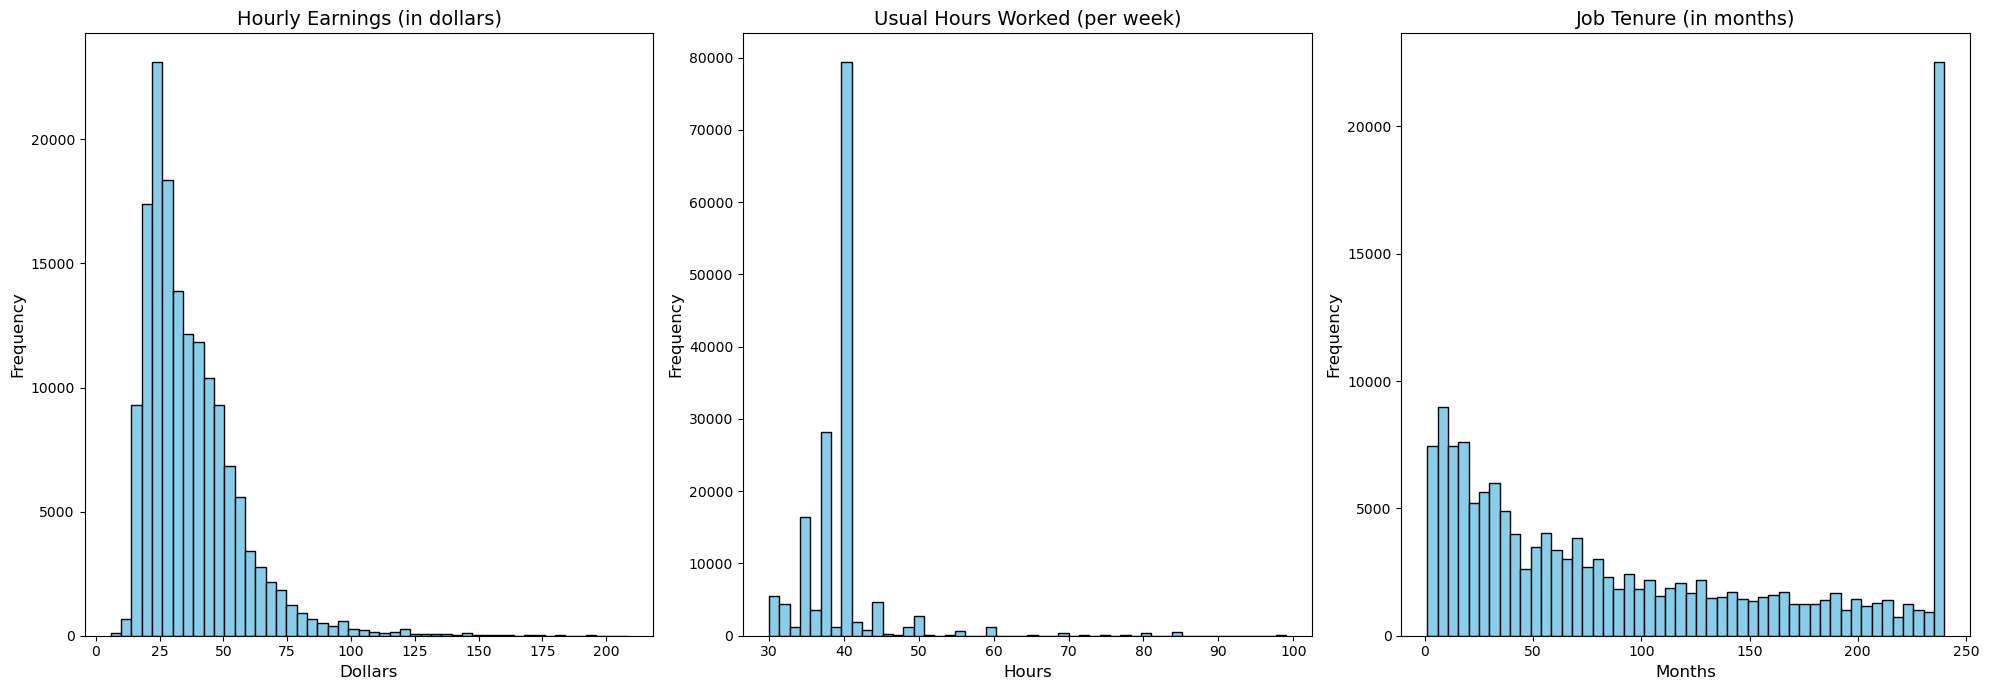

In [81]:
# Feature series to be plotted
feature_series = [data3['HRLYEARN'], data3['UHRSMAIN'], data3['TENURE']]

# Create subplots
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 7))

# Add titles and labels
titles = ['Hourly Earnings (in dollars)', 'Usual Hours Worked (per week)', 'Job Tenure (in months)']
x_labels = ['Dollars', 'Hours', 'Months']

# Plot each feature in a separate subplot
for i, axi in enumerate(ax.flat):
    try:
        axi.hist(feature_series[i], bins=50, color='skyblue', edgecolor='black')
        axi.set_title(titles[i], fontsize=14)
        axi.set_xlabel(x_labels[i], fontsize=12)
        axi.set_ylabel('Frequency', fontsize=12)
    except IndexError:
        break

plt.tight_layout()
plt.show()

In [87]:
# Perform Shapiro-Wilk test
for column in ['HRLYEARN','UHRSMAIN','TENURE']:
    stat, p = stats.shapiro(data3[column])
    print(f'Statistic: {stat}, p-value: {p}')
    # Interpret the result
    alpha = 0.05
    if p > alpha:
        print(f'{column} looks like a normal distribution (fail to reject H0)')
    else:
        print(f'{column} does not look like a normal distribution (reject H0)')

Statistic: 0.8565079569816589, p-value: 0.0
HRLYEARN does not look like a normal distribution (reject H0)
Statistic: 0.6125021576881409, p-value: 0.0
UHRSMAIN does not look like a normal distribution (reject H0)
Statistic: 0.8704522252082825, p-value: 0.0
TENURE does not look like a normal distribution (reject H0)


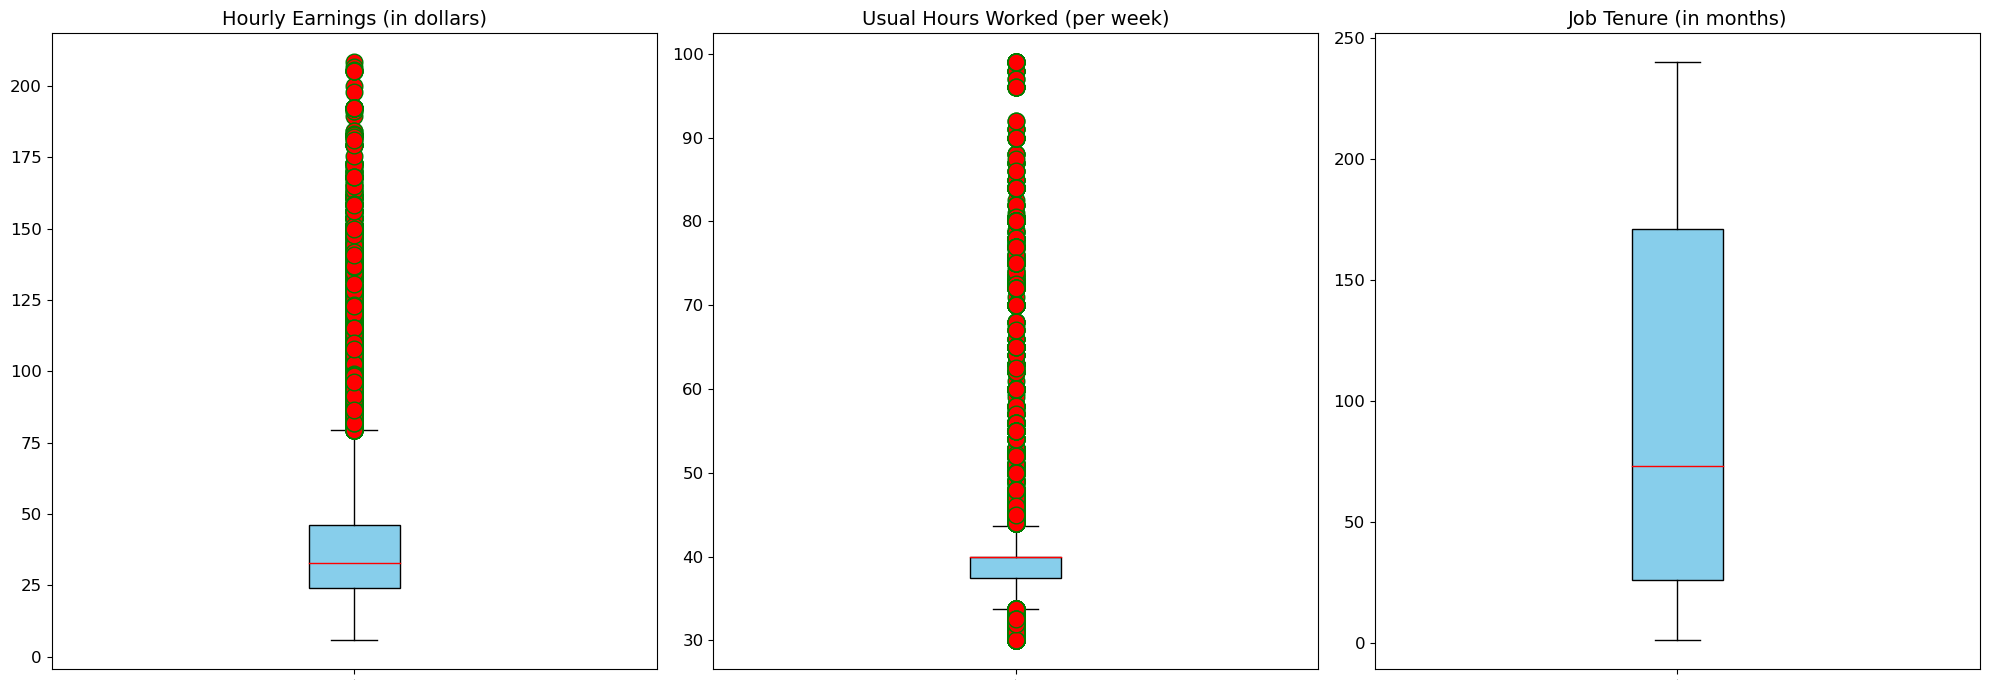

In [84]:
# Feature series to be plotted
feature_series = [data3['HRLYEARN'], data3['UHRSMAIN'], data3['TENURE']]
feature_labels = ['Hourly Earnings (in dollars)', 'Usual Hours Worked (per week)', 'Job Tenure (in months)']

# Customize flier properties for outliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='g')

# Create subplots
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20, 7))

# Plot each feature in a separate subplot
for i, axi in enumerate(ax.flat):
    try:
        axi.boxplot(feature_series[i], flierprops=flierprops, patch_artist=True,
                    boxprops=dict(facecolor='skyblue', color='black'),
                    capprops=dict(color='black'),
                    whiskerprops=dict(color='black'),
                    medianprops=dict(color='red'))
        axi.set_title(feature_labels[i], fontsize=14)
        axi.tick_params(axis='y', labelsize=12)
        axi.tick_params(axis='x', labelsize=0)
    except IndexError:
        break

plt.tight_layout()
plt.show()

In [55]:
# 5 number summary for HRLYEARN.
Q1_HRLYEARN = np.percentile(data3['HRLYEARN'], 25)
Q2_HRLYEARN  = np.percentile(data3['HRLYEARN'], 50)
Q3_HRLYEARN  = np.percentile(data3['HRLYEARN'], 75)
min_value_HRLYEARN  = np.min(data3['HRLYEARN'])
max_value_HRLYEARN  = np.max(data3['HRLYEARN'])
IQR_HRLYEARN = Q3_HRLYEARN  - Q1_HRLYEARN 
print("Five Number Summary Q1,Q2,Q3,min_value,max_value, and IQR:",Q1_HRLYEARN ,Q2_HRLYEARN ,Q3_HRLYEARN , min_value_HRLYEARN ,max_value_HRLYEARN , IQR_HRLYEARN)

#The outlier fences for HRLYEARN
lower_bound = 0
upper_bound = Q3_HRLYEARN  + (1.5 * IQR_HRLYEARN )
print("Upper Bound and Lower Bound:",lower_bound,upper_bound)

plt.figure(figsize=(12, 6))
sns.boxplot(x=data3['HRLYEARN'], color='seagreen')

# Highlighting the outlier thresholds
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Threshold')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Threshold')


# Adding a title and legend
plt.title('Boxplot of Hourly Wages', fontsize=16, fontweight='bold')
plt.legend()

# Show the plot
plt.show()

Five Number Summary -Q1,Q2,Q3,min_value,max_value, and IQR: 24.0 32.79 46.15 5.77 208.33 22.15
Upper Bound and Lower Bound: 0 79.375


/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_2475/4134574961.py:28: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [56]:
Q1_UHRSMAIN = np.percentile(data2['UHRSMAIN'], 25)
Q2_UHRSMAIN = np.percentile(data2['UHRSMAIN'], 50)
Q3_UHRSMAIN = np.percentile(data2['UHRSMAIN'], 75)
min_value_UHRSMAIN = np.min(data2['UHRSMAIN'])
max_value_UHRSMAIN = np.max(data2['UHRSMAIN'])
IQR_UHRSMAIN = Q3_UHRSMAIN - Q1_UHRSMAIN
print("Five Number Summary Q1,Q2,Q3,min_value,max_value, and IQR:",Q1_UHRSMAIN,Q2_UHRSMAIN,Q3_UHRSMAIN, min_value_UHRSMAIN,max_value_UHRSMAIN, IQR_UHRSMAIN)

#The outlier fencesfor HRLYEARN
lower_bound = 0
upper_bound = Q3_UHRSMAIN = np.percentile(data2['UHRSMAIN'], 75)+ (1.5 * IQR_UHRSMAIN)

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data2['UHRSMAIN'], color='seagreen')

# Highlighting the outlier thresholds
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Threshold')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Threshold')


# Adding a title and legend
plt.title('Boxplot of UHRSMAIN', fontsize=16, fontweight='bold')
plt.legend()

# Show the plot
plt.show()


Five Number Summary -Q1,Q2,Q3,min_value,max_value, and IQR: 37.5 40.0 40.0 30.0 99.0 2.5


/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_2475/805528681.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [57]:
Q1_TENURE = np.percentile(data2['TENURE'], 25)
Q2_TENURE = np.percentile(data2['TENURE'], 50)
Q3_TENURE = np.percentile(data2['TENURE'], 75)
min_value_TENURE = np.min(data2['TENURE'])
max_value_TENURE = np.max(data2['TENURE'])
IQR_TENURE = Q3_TENURE - Q1_TENURE
print("Five Number Summary Q1,Q2,Q3,min_value,max_value, and IQR:",Q1_TENURE,Q2_TENURE,Q3_TENURE, min_value_TENURE,max_value_TENURE, IQR_TENURE)

#The outlier fencesfor HRLYEARN
lower_bound = 0
upper_bound = Q3_TENURE = np.percentile(data2['TENURE'], 75)+ (1.5 * IQR_TENURE)

# Create a box plot
plt.figure(figsize=(12, 6))
sns.boxplot(x=data2['TENURE'], color='seagreen')

# Highlighting the outlier thresholds
plt.axvline(x=lower_bound, color='red', linestyle='--', label='Lower Threshold')
plt.axvline(x=upper_bound, color='red', linestyle='--', label='Upper Threshold')


# Adding a title and legend
plt.title('Boxplot of TENURE', fontsize=16, fontweight='bold')
plt.legend()

# Show the plot
plt.show()


Five Number Summary Q1,Q2,Q3,min_value,max_value, and IQR: 26.0 73.0 171.0 1.0 240.0 145.0


/var/folders/0f/v6wgxn554tx62wm1nqjqw5hw0000gn/T/ipykernel_2475/4226779220.py:27: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plt.show()


In [59]:
#checking for outliers in the response variable using IQR
outliers_HRLYEARN = data3[(data2['HRLYEARN'] < (Q1_HRLYEARN - 1.5 * IQR_HRLYEARN)) | (data3['HRLYEARN'] > (Q3_HRLYEARN + 1.5 * IQR_HRLYEARN))]
outliers_UHRSMAIN = data3[(data3['UHRSMAIN'] < (Q1_UHRSMAIN - 1.5 * IQR_UHRSMAIN)) | (data3['UHRSMAIN'] > (Q3_UHRSMAIN + 1.5 * IQR_UHRSMAIN))]
outliers_TENURE = data3[(data3['TENURE'] < (Q1_TENURE - 1.5 * IQR_TENURE)) | (data3['TENURE'] > (Q3_TENURE + 1.5 * IQR_TENURE))]
print("The number of outliers for HRLYEARN, UHRSMAIN, and TENURE are:",len(outliers_HRLYEARN),len(outliers_UHRSMAIN),len(outliers_TENURE))
print("The shape of the working dataset is:",data3.shape)
#The outliers account for 14.83% of the data. The outliers will be removed from the dataset.

The number of outliers for HRLYEARN, UHRSMAIN, and TENURE are: 4685 18344 0
The shape of the working dataset is: (155250, 13)


In [60]:
data4=data3[:]
# Crating a newdataframe to remove the outliers from data3

In [61]:
#removing the outliers from the dataset
data4 = data4[(data4['HRLYEARN'] >= (Q1_HRLYEARN - 1.5 * IQR_HRLYEARN)) & (data4['HRLYEARN'] <= (Q3_HRLYEARN + 1.5 * IQR_HRLYEARN))]
data4 = data4[(data4['UHRSMAIN'] >= (Q1_UHRSMAIN - 1.5 * IQR_UHRSMAIN)) & (data4['UHRSMAIN'] <= (Q3_UHRSMAIN + 1.5 * IQR_UHRSMAIN))]
data4 = data4[(data4['TENURE'] >= (Q1_TENURE - 1.5 * IQR_TENURE)) & (data4['TENURE'] <= (Q3_TENURE + 1.5 * IQR_TENURE))]

In [65]:
print("The median of the response variable before and after removing the outliers:", data3["HRLYEARN"].median(),data4["HRLYEARN"].median())

The median of the response variable before and after removing the outliers: 32.79 32.69


In [63]:
sample_data = data4["HRLYEARN"]  
# Hypothetical median
hypothetical_median = 33.55 #Population median
differences = sample_data - hypothetical_median

# Perform one-sample Wilcoxon signed-rank test
statistic, p_value = stats.wilcoxon(differences)
print(f"Wilcoxon signed-rank test: statistic = {statistic}, p-value = {p_value}")


Wilcoxon signed-rank test: statistic = 4053456689.5, p-value = 2.6952684862375583e-134 32.69


In [90]:
summary_statistics_table_continuous_variables_before_outliers=statistics_table(data3[['HRLYEARN','UHRSMAIN','TENURE']])
summary_statistics_table_continuous_variables_after_outliers=statistics_table(data4[['HRLYEARN','UHRSMAIN','TENURE']])
# Creating the summary statistics table for the continuous variables before and after removing the outliers

summary_statistics_table_continuous_variables_before_outliers.to_excel('Continuous Variables Before Removing outliers.xlsx',index=False)  
summary_statistics_table_continuous_variables_after_outliers.to_excel('Continuous Variables After Removing outliers.xlsx',index=False)  
# Exporting the summary statistics table for the continuous variables before and after removing the outliers